# HW2/Final Project Template: Dataset Overview and Use Case Examples
## EDS 220, Fall 2022

The following is a template you can use for constructing your draft Jupyter notebooks demonstrating the features and use case examples for your chosen environmental datasets. I've included sections addressing the major themes that should be included, but there is also room for customization as well. 

Many of the resources provided are adapted from this template guide to notebook creation built for the "EarthCube" project:
https://github.com/earthcube/NotebookTemplates

## Template Notebook for EDS 220 Group Project

Replace the above with your chosen title. This should include some indication of the dataset you chose, but can also include a 'team title' or short summary of the themes of your analysis. Possible examples might be something like:
- ERSSTv5 Sea Surface Temperature 
- National Land Cover Database Overview

#### Authors
All authors are affiliated with the Bren School of Environmental Science and Management at the University of California Santa Barbara
- Kiran Favre, Masters of Environmental Data Science, 2023, kfavre@ucsb.edu
- Jillian Allison, Masters of Environmental Data Science, 2023, jilliannallison@ucsb.edu
- Erica Bishop, Masters of Environmental Data Science, 2023, ericabishop@ucsb.edu


## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

We are creating this notebook to: 
- Explain the contents of iNaturalist data: what data is collected and what is the associated metadata? 
- Demonstrate how to download this data for analysis 
- Show programmers some examples of visualizing and working with data from iNaturalist using Python


<a id='overview'></a> 
### Dataset Description

This dataset is a collection of iNaturalist research grade observations. Research grade observations are defined by having a photo, date, and coordinate provided and the community agrees upon the identification. iNaturalist is a program that provides a social network for citizen scientists to upload photos of different species along with location and time collected. With a photo, iNaturalist is used to identify the species in the photo based on previous users’ uploads and community input. This data set was created and hosted by iNaturalist, an initiative by the California Academy of Sciences and National Geographic Society. It is also hosted on GBIF. “GBIF- the Global Biodiversity Information Facility- is an international network and data infrastructure funded by the world’s governments and aimed at providing anyone, anywhere, open access to data about all types of life on Earth.” GBIF holds institutions around the world to similar data standards, allowing everyone access to consistent and reliable ecological data.

The iNaturalist dataset’s temporal span is from 1768 to present. Older data is based on historical records. The iNaturalist app was created in 2008, and people with iPhones have uploaded their own data via the app in recent years. iNaturalist data covers the entire globe.

There are a few different ways that we can access iNaturalist data. iNaturalist does manage an export feature on their website, but they note that large exports slow down their infrastructure. Their top recommendation for exporting data is to use GBIF. The file format used to store the data is a tab -delimited CSV.

Some issues with data quality are highlighted by tags on the download report. Some of these issues include matching taxon to the correct identification, matching incorrect countries and coordinates, or multimedia date invalidities. 


<a id='io'></a> 
### Dataset Input/Output 

First, set up an account on GBIF, you can use your GitHub account to set this up. After you've created an account, you have two options for downloading data, the GBIF API or a file download.

**Using the API**

The GBIF API is relatively easy to use. The prerequisity `pygbif` package for importing data into a python envionrment is already instealled in the Python 3 kernel on Taylor. The API includes several different modules that you can use to search and query data. The examples below show how to use the `species` module or the `occurences` module to get iNaturalist data on Adelie penguins.

There are many arguments you can use to query data from the API, and data is returned as a dictionary. Checkout the [pygbif 0.6.1 documentation](https://pygbif.readthedocs.io/en/latest/index.html) for more query examples.


In [1]:
import pygbif #package to interface with GBIF API
from pygbif import species
adeliae_dict = species.name_lookup(institution_code="iNaturalist", q='Pygoscelis adeliae') #using the species lookup

ModuleNotFoundError: No module named 'pygbif'

**Using file download**

For easily importing data you're interested in, you may want to download a TSV file from GBIF.

**Reading in data to your environment**

1) Import necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import cartopy
import cartopy.crs as ccrs

2) Parameters for our data

Our iNaturalist data:
- names of any directories where data are stored
- ranges of years over which data are valid
- any thresholds or latitude/longitude ranges to be used later (e.g. dimensions of NINO3.4 region, threshold SSTA values for El Nino, etc.)

3) Read in the data:

In [4]:
sb_inat = pd.read_csv("/courses/EDS214/EDS220_gbffs/inat_sb_recent.csv", sep = '\t') #make sure to update the file path to where your data is stored


<a id='display'></a> 
### Metadata Display and Basic Visualization

Next, provide some example commands to take a quick look at what is in your dataset. We've done some things along these lines in class by now, but you should include at least one of:

- Metadata display: commands to indicate a) which variables are included in the dataset and their names; b) coordinate information associated with the data variables; c) other important metadata parameters (site names, etc); and d) any important information on missing data
- Basic visualization: a "quick and dirty" plot showing generally what the data look like. Depending on your dataset, this could be either a time series or a map (no fancy coordinate reference system/projection needed yet).

In [5]:
#explore the data
print(sb_inat.head())
print(sb_inat.tail())
print(sb_inat.shape)

       gbifID                            datasetKey  \
0  1703218988  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
1  2542877676  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
2  2236229147  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
3  2826332347  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
4  2963805574  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                        occurrenceID   kingdom        phylum  \
0   https://www.inaturalist.org/observations/8964710   Plantae  Tracheophyta   
1  https://www.inaturalist.org/observations/14123375   Plantae  Tracheophyta   
2  https://www.inaturalist.org/observations/22100520   Plantae  Tracheophyta   
3  https://www.inaturalist.org/observations/54560051  Animalia    Arthropoda   
4  https://www.inaturalist.org/observations/63292703  Animalia      Chordata   

           class          order       family        genus  \
0  Magnoliopsida        Rosales     Rosaceae  Heteromeles   
1  Magnoliopsida       Lamiales    Lamiaceae  Trichostema   
2  Ma

In [6]:
#look at just the columns
list(sb_inat.columns)

['gbifID',
 'datasetKey',
 'occurrenceID',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'infraspecificEpithet',
 'taxonRank',
 'scientificName',
 'verbatimScientificName',
 'verbatimScientificNameAuthorship',
 'countryCode',
 'locality',
 'stateProvince',
 'occurrenceStatus',
 'individualCount',
 'publishingOrgKey',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'coordinatePrecision',
 'elevation',
 'elevationAccuracy',
 'depth',
 'depthAccuracy',
 'eventDate',
 'day',
 'month',
 'year',
 'taxonKey',
 'speciesKey',
 'basisOfRecord',
 'institutionCode',
 'collectionCode',
 'catalogNumber',
 'recordNumber',
 'identifiedBy',
 'dateIdentified',
 'license',
 'rightsHolder',
 'recordedBy',
 'typeStatus',
 'establishmentMeans',
 'lastInterpreted',
 'mediaType',
 'issue']

In [7]:
#look at how many species
print(len(sb_inat['species'].unique()))

4581


In [8]:
#investigate the species
sb_species = sb_inat['species']
sb_species.head()

#see how many plants there are!
sb_plants = sb_inat[sb_inat['kingdom'] == "Plantae"]
print(len(sb_plants['species'].unique()))

#what about ANIMALS?
sb_animals = sb_inat[sb_inat['kingdom'] == "Animalia"]
print(len(sb_animals['species'].unique())) #more animal observations!

1590
2596


In [9]:
#filter tarantula species to plot
tarantulas = sb_inat.loc[sb_inat['family'] == "Theraphosidae"]

<AxesSubplot: >

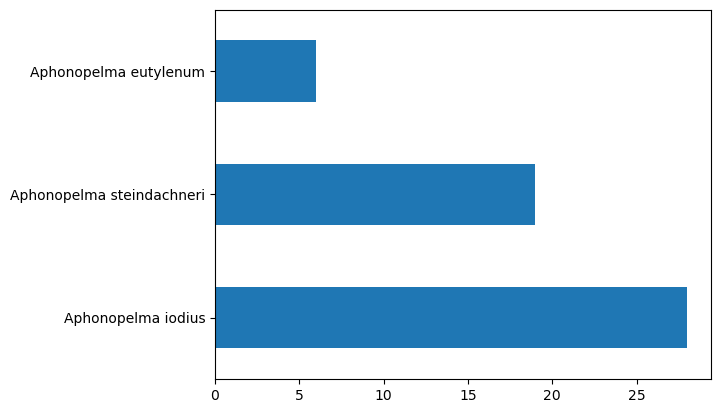

In [10]:
#basic plot: number of tarantula observatons in iNaturalist over time

tarantulas['species'].value_counts().plot(kind = 'barh')



<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. 

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


ValueError: could not convert string to float: '50c9509d-22c7-4a22-a47d-8c48425ef4a7'

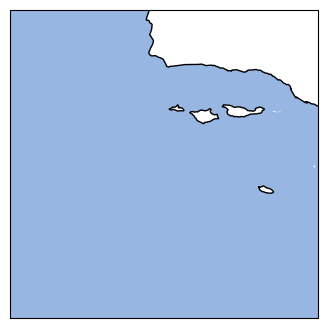

In [12]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-119,-122,32,35])   # change region to SB area
ax.coastlines()  # add coastlines

# Add coloring for ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add species data
cf = ax.contourf(sb_inat.decimalLongitude, sb_inat.decimalLatitude, tarantulas, transform=ccrs.PlateCarree())

# Add colorbar
fig.colorbar(cf,ax=ax)

### Example: Filtering data for species within some distance from a point

iNaturalist datapoints contain spatial information in the form of decimal latitude and longitude. Users may wonder how frequently a species has been seen near a specific location. Some example uses for this application of iNaturalist data include: 
* An open space manager wonders if native plant restoration is successfully attracting wildlife, so she'd like to see if certain species have been spotted within the site. 
* A potential property owner is curious if certain predatory species have been spotted near this property. 
* A bird watching enthusiast is curious what different bird species have been seen within walking distance from their home.

**In this example, we'll be answering a question that I'm sure is on many of your minds: how many tarantula sightings have been reported within 1 mile of Bren Hall since the iNaturalist app launched in 2008?** 

In [3]:
import shapely 
import geopandas as gpd
import pandas as pd

# Repeated--- read in the data! 
sb_inat = pd.read_csv("/courses/EDS214/EDS220_gbffs/inat_sb_recent.csv", sep = '\t') #make sure to update the file path to where your data is stored

# Remember our tarantulas object from our first visualization! 
tarantulas = sb_inat.loc[sb_inat['family'] == "Theraphosidae"]

In [70]:
# Using shapely, create geometries from your lat-lons
geom_list = [shapely.geometry.Point(lon,lat) for lon,lat in zip(tarantulas["decimalLongitude"] , tarantulas["decimalLatitude"])] # check the ordering of lon/lat

# Create GeoPandas geodataframe
tarantulas_gdf = gpd.GeoDataFrame(tarantulas, geometry=geom_list, crs={"init":"EPSG:4326"})

/opt/python/3.10.5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [71]:
# Lets look at this CRS

tarantulas_gdf.crs # it's in degrees, we want it in meters! we should reproject it

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [77]:
tarantulas_rpj = tarantulas_gdf.to_crs("EPSG:6423") # NAD83 California Zone 5-- includes SB

tarantulas_rpj.crs # now the unit of measurement is in meters! 

tarantulas_rpj

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
2201,1898831738,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/15782961,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma steindachneri,...,2018-08-22T14:39:55,CC_BY_NC_4_0,djparisi,djparisi,NaN,NaN,2022-11-11T17:35:19.792Z,StillImage,COORDINATE_ROUNDED,POINT (1896122.417 607152.305)
7013,2563466165,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/33991504,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma iodius,...,2019-10-07T09:59:46,CC_BY_NC_4_0,oasaleh,oasaleh,NaN,NaN,2022-11-11T17:32:13.501Z,StillImage;StillImage;StillImage;StillImage,COORDINATE_ROUNDED,POINT (1838083.714 607598.964)
10105,2294451477,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28654164,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma eutylenum,...,2019-07-13T12:58:15,CC_BY_NC_4_0,Paul G.,Paul G.,NaN,NaN,2022-11-11T17:32:04.720Z,StillImage;StillImage,COORDINATE_ROUNDED,POINT (1878580.066 601568.502)
10215,2423071640,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/32731888,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma iodius,...,2019-09-25T22:27:44,CC_BY_NC_4_0,Rachel Behm,Rachel Behm,NaN,NaN,2022-11-11T17:32:07.187Z,StillImage,NaN,POINT (1812971.008 634034.974)
11666,2826483417,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/54586761,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma iodius,...,2020-07-28T01:12:53,CC_BY_NC_4_0,Pamella Passaro,Pamella Passaro,NaN,NaN,2022-11-11T17:36:15.298Z,StillImage,COORDINATE_ROUNDED,POINT (1843906.512 603461.624)
13170,2445037736,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34541639,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma iodius,...,2019-10-19T09:29:27,CC_BY_NC_4_0,Jeff Goddard,Jeff Goddard,NaN,NaN,2022-11-11T17:35:30.788Z,StillImage;StillImage,COORDINATE_ROUNDED,POINT (1809199.110 638230.512)
13965,2563472519,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/35937770,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma iodius,...,2019-11-22T11:26:23,CC_BY_NC_4_0,susantuttle,susantuttle,NaN,NaN,2022-11-11T17:35:38.527Z,StillImage,COORDINATE_ROUNDED,POINT (1785386.106 653887.969)
15564,2898321022,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/62418607,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma iodius,...,2020-10-13T01:48:51,CC_BY_NC_4_0,ljefe,ljefe,NaN,NaN,2022-11-11T17:33:07.528Z,StillImage;StillImage;StillImage,COORDINATE_ROUNDED,POINT (1816952.711 626418.168)
17353,2350387486,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/30655276,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma steindachneri,...,2019-08-12T00:32:39,CC_BY_NC_4_0,kathleen_hughes,kathleen_hughes,NaN,NaN,2022-11-11T17:32:04.765Z,StillImage;StillImage;StillImage;StillImage,COORDINATE_ROUNDED,POINT (1882120.081 602351.215)
18116,3335121543,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/88076440,Animalia,Arthropoda,Arachnida,Araneae,Theraphosidae,Aphonopelma,Aphonopelma steindachneri,...,2021-07-24T04:39:47,CC_BY_NC_4_0,laika14a,laika14a,NaN,NaN,2022-11-11T17:33:56.618Z,StillImage,COORDINATE_ROUNDED,POINT (1876546.414 601756.856)


In [88]:

ucsb_df = pd.DataFrame(
    {'Location': ['Bren Hall'],
     'Latitude': [34.413059],
     'Longitude': [-119.841826]})

ucsb_gdf = gpd.GeoDataFrame(
    ucsb_df, geometry=gpd.points_from_xy(ucsb_df.Longitude, ucsb_df.Latitude), crs={"init":"EPSG:4326"})

ucsb_gdf = ucsb_gdf.to_crs("EPSG:6423")

ucsb_buffer = ucsb_gdf.buffer(16090).unary_union

friendly_neighbors = tarantulas_rpj["geometry"].within(ucsb_buffer)

friendly_neighbors

/opt/python/3.10.5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


2201      False
7013       True
10105     False
10215     False
11666      True
13170     False
13965     False
15564     False
17353     False
18116     False
21552     False
23709     False
30982     False
32114     False
47626     False
51240      True
55444      True
59498     False
62806     False
67771     False
68075     False
68931     False
69564     False
73228      True
73589     False
76180     False
77424     False
87959     False
88021     False
91075     False
91482     False
92300     False
93191     False
95176     False
97508     False
101186     True
101272     True
101719    False
103400    False
107116    False
111392    False
117538    False
119158    False
122706    False
125532    False
125628    False
126228    False
129818    False
134137    False
135522    False
135711    False
137610    False
141418     True
dtype: bool

<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

List relevant references. Here are some additional resources on creating professional, shareable notebooks you may find useful:

1. Notebook sharing guidelines from reproducible-science-curriculum: https://reproducible-science-curriculum.github.io/publication-RR-Jupyter/
2. Guide for developing shareable notebooks by Kevin Coakley, SDSC: https://github.com/kevincoakley/sharing-jupyter-notebooks/raw/master/Jupyter-Notebooks-Sharing-Recommendations.pdf
3. Guide for sharing notebooks by Andrea Zonca, SDSC: https://zonca.dev/2020/09/how-to-share-jupyter-notebooks.html
4. Jupyter Notebook Best Practices: https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69
5. Introduction to Jupyter templates nbextension: https://towardsdatascience.com/stop-copy-pasting-notebooks-embrace-jupyter-templates-6bd7b6c00b94  
    5.1. Table of Contents (Toc2) readthedocs: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html  
    5.2. Steps to install toc2: https://stackoverflow.com/questions/23435723/installing-ipython-notebook-table-of-contents
6. Rule A, Birmingham A, Zuniga C, Altintas I, Huang SC, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLOS Computational Biology 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007. Supplementary materials: example notebooks (https://github.com/jupyter-guide/ten-rules-jupyter) and tutorial (https://github.com/ISMB-ECCB-2019-Tutorial-AM4/reproducible-computational-workflows)
7. Languages supported by Jupyter kernels: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
8. EarthCube notebooks presented at EC Annual Meeting 2020: https://www.earthcube.org/notebooks
9. Manage your Python Virtual Environment with Conda: https://towardsdatascience.com/manage-your-python-virtual-environment-with-conda-a0d2934d5195
10. Venv - Creation of Virtual Environments: https://docs.python.org/3/library/venv.html